2024-10-25

# Ground state at baryon number B

This finds the combination of neutral atoms with a given number of total nucleons that has the lowest total mass (i.e. lowest energy).

Fe-56 is the ground state for large B, but I was curious about the full range.

Note the cycle of length 56 for B >~ 450. After that point, there's always at least one Fe-56. Most of the remainder mod 56 is accounted for with Ni-62 on the long side, or a bit of Cr-52 on the short side, with other Fe, Ni, Cr, Mn, Co isotopes as small change.

This includes electron mass and electron orbital energy, but excludes the tiny mass defect from chemical bonding. For bulk Fe-56 this is 415 kJ/mol_atom = ~0.08 eV/nucleon = ~8e-11 amu/nucleon, which is about 1e5 smaller than the Fe-56 -- Ni-62 binding energy difference.

This is for neutral matter; charge complicates things because e-e+ pairs aren't free.

In [63]:
import periodictable as pt
import pandas as pd
import numpy as np

# don't blame me, Claude wrote this and I fixed it up

def get_stable_isotopes():
    """
    Returns a DataFrame of the most stable isotopes for each mass number.
    
    Returns:
        pd.DataFrame: Contains columns for mass number, atomic number,
                     element symbol, atomic mass, and binding energy per nucleon
    """
    isotopes = []
    
    # Collect all isotopes
    for element in pt.elements:
        for isotope in element:
            mass_number = int(round(isotope.mass))
            
            isotopes.append({
                'mass_number': mass_number,
                'atomic_number': element.number,
                'symbol': str(isotope),
                'atomic_mass': isotope.mass,
            })
    
    # Convert to DataFrame
    df = pd.DataFrame(isotopes)
    
    # For each mass number, select the isotope with the longest half-life
    most_stable = df.sort_values('atomic_mass', ascending=True).groupby('mass_number').first()
    
    return most_stable.sort_index().reset_index()

df = get_stable_isotopes()

def get_mass(mass_number):
    """
    Get atomic mass for the most stable isotope of a given mass number.
    
    Args:
        mass_number (int): Mass number to look up
        
    Returns:
        float: exact mass
    """

    res = list(df[df['mass_number'] == mass_number].iloc)
    if res:
        isotope = res[0]
        return isotope['atomic_mass'], isotope['symbol']
    return None

In [61]:
[str(i) for i in pt.H]

['1-H', 'D', 'T', '4-H', '5-H', '6-H']

In [64]:
binding = {i: get_mass(i)[0] - i for i in range(1, 274)}

In [86]:
binding[62] / 62 - binding[56] / 56

np.float64(6.0836981567019815e-06)

In [65]:
symbols = {i: get_mass(i)[1] for i in range(1, 274)}

In [78]:
def binding_(i):
    return binding[i] if i < 274 else np.inf

def binding_sum(part):
    return sum(binding_(i) for i in part)

best_parts = {1: [1]}
for i in range(2, 600):
    best_part = [i]
    for j in range(1, i):
        candidate_mass = binding_(i - j) + binding_sum(best_parts[j])
        if candidate_mass < binding_sum(best_part):
            best_part = [i - j] + best_parts[j]
    best_parts[i] = best_part

In [93]:
best_masses = [1 + binding_sum(part) / i for i, part in best_parts.items()]

In [89]:
import matplotlib.pyplot as plt

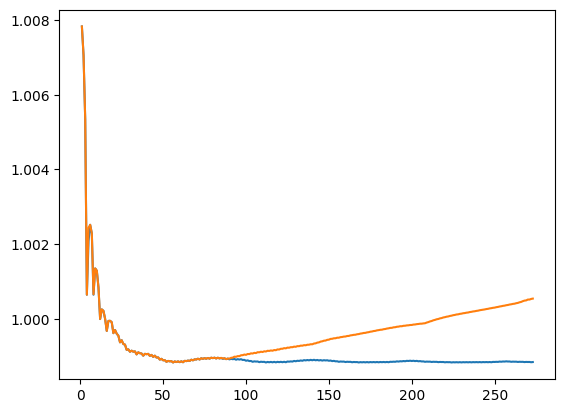

In [106]:
ns = best_parts.keys()
ns_pt = range(1, 274)
plt.plot(ns_pt, best_masses[:273])
plt.plot(ns_pt, [get_mass(n)[0]/n for n in ns_pt])
plt.show()

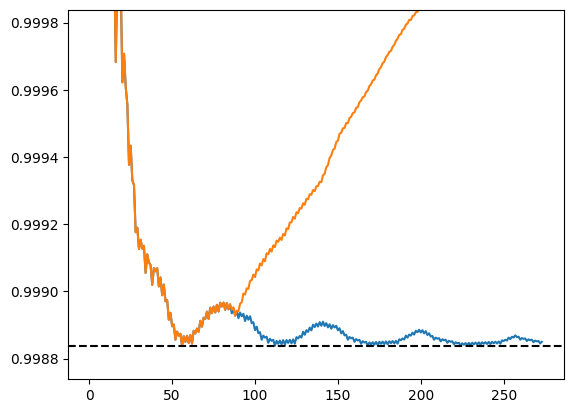

In [115]:
ns = best_parts.keys()
ns_pt = range(1, 274)
plt.plot(ns_pt, best_masses[:273])
plt.plot(ns_pt, [get_mass(n)[0]/n for n in ns_pt])
plt.ylim(np.min(best_masses) - .0001, np.min(best_masses) + .001)
plt.axhline(y=np.min(best_masses), ls='--', color='k')
plt.show()

In [79]:
best_symbols = {i: [symbols[j] for j in best_part] for i, best_part in best_parts.items()}

In [83]:
{i: bs for i, bs in best_symbols.items() if len(bs) > 1 and len(set(bs)) == 1}

{8: ['4-He', '4-He'],
 96: ['48-Ti', '48-Ti'],
 104: ['52-Cr', '52-Cr'],
 112: ['56-Fe', '56-Fe'],
 120: ['60-Ni', '60-Ni'],
 124: ['62-Ni', '62-Ni'],
 132: ['66-Zn', '66-Zn'],
 156: ['52-Cr', '52-Cr', '52-Cr'],
 168: ['56-Fe', '56-Fe', '56-Fe'],
 186: ['62-Ni', '62-Ni', '62-Ni'],
 208: ['52-Cr', '52-Cr', '52-Cr', '52-Cr'],
 224: ['56-Fe', '56-Fe', '56-Fe', '56-Fe'],
 248: ['62-Ni', '62-Ni', '62-Ni', '62-Ni'],
 260: ['52-Cr', '52-Cr', '52-Cr', '52-Cr', '52-Cr'],
 280: ['56-Fe', '56-Fe', '56-Fe', '56-Fe', '56-Fe'],
 310: ['62-Ni', '62-Ni', '62-Ni', '62-Ni', '62-Ni'],
 336: ['56-Fe', '56-Fe', '56-Fe', '56-Fe', '56-Fe', '56-Fe'],
 372: ['62-Ni', '62-Ni', '62-Ni', '62-Ni', '62-Ni', '62-Ni'],
 392: ['56-Fe', '56-Fe', '56-Fe', '56-Fe', '56-Fe', '56-Fe', '56-Fe'],
 434: ['62-Ni', '62-Ni', '62-Ni', '62-Ni', '62-Ni', '62-Ni', '62-Ni'],
 448: ['56-Fe', '56-Fe', '56-Fe', '56-Fe', '56-Fe', '56-Fe', '56-Fe', '56-Fe'],
 504: ['56-Fe',
  '56-Fe',
  '56-Fe',
  '56-Fe',
  '56-Fe',
  '56-Fe',
  '56-Fe',

In [77]:
print(max([i for i in best_symbols if '56-Fe' not in best_symbols[i]]))

494


In [80]:
for i, syms in best_symbols.items():
    print(i, syms)

1 ['1-H']
2 ['D']
3 ['3-He']
4 ['4-He']
5 ['4-He', '1-H']
6 ['6-Li']
7 ['7-Li']
8 ['4-He', '4-He']
9 ['9-Be']
10 ['10-B']
11 ['11-B']
12 ['12-C']
13 ['13-C']
14 ['14-N']
15 ['15-N']
16 ['16-O']
17 ['17-O']
18 ['18-O']
19 ['19-F']
20 ['20-Ne']
21 ['21-Ne']
22 ['22-Ne']
23 ['23-Na']
24 ['24-Mg']
25 ['25-Mg']
26 ['26-Mg']
27 ['27-Al']
28 ['28-Si']
29 ['29-Si']
30 ['30-Si']
31 ['31-P']
32 ['32-S']
33 ['33-S']
34 ['34-S']
35 ['35-Cl']
36 ['36-S']
37 ['37-Cl']
38 ['38-Ar']
39 ['39-K']
40 ['40-Ar']
41 ['41-K']
42 ['42-Ca']
43 ['43-Ca']
44 ['44-Ca']
45 ['45-Sc']
46 ['46-Ti']
47 ['47-Ti']
48 ['48-Ti']
49 ['49-Ti']
50 ['50-Ti']
51 ['51-V']
52 ['52-Cr']
53 ['53-Cr']
54 ['54-Cr']
55 ['55-Mn']
56 ['56-Fe']
57 ['57-Fe']
58 ['58-Fe']
59 ['59-Co']
60 ['60-Ni']
61 ['61-Ni']
62 ['62-Ni']
63 ['63-Cu']
64 ['64-Ni']
65 ['65-Cu']
66 ['66-Zn']
67 ['67-Zn']
68 ['68-Zn']
69 ['69-Ga']
70 ['70-Ge']
71 ['71-Ga']
72 ['72-Ge']
73 ['73-Ge']
74 ['74-Ge']
75 ['75-As']
76 ['76-Se']
77 ['77-Se']
78 ['78-Se']
79 ['79-Br'